In [393]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [394]:
data = pd.read_csv("crimes_count.csv")
data

,Date,Count,Violent,Arrest,Domestic,Community Area,moonphase,solarenergy,solarradiation,visibility,...,sealevelpressure,winddir,windspeed,snowdepth,snow,precip,humidity,dew,feelslike,temp
0,2010-01-01,74,25,16,16,25.445946,0.53,6.6,76.1,15.1,...,1027.3,296.7,21.2,0.6,0.0,0.000,69.8,-16.1,-19.0,-11.7
1,2010-01-02,51,17,22,3,25.372549,0.57,8.5,97.6,15.8,...,1031.7,317.8,24.0,0.6,0.0,0.000,63.1,-19.6,-22.6,-14.1
2,2010-01-03,44,18,15,13,25.136364,0.60,7.6,88.0,15.6,...,1031.6,319.3,24.2,0.5,0.0,0.000,66.0,-17.6,-20.5,-12.5
3,2010-01-04,52,16,21,5,NaN,0.64,3.5,44.0,15.7,...,1026.6,312.5,23.3,0.4,0.0,0.000,69.8,-14.6,-17.6,-10.2
4,2010-01-05,52,13,29,8,25.615385,0.67,5.8,67.5,15.4,...,1024.1,299.9,21.9,0.4,0.0,0.000,70.8,-12.3,-14.2,-7.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5163,2024-02-20,42,16,17,9,25.738095,0.37,11.1,128.0,15.9,...,1021.0,184.6,26.7,0.0,0.0,0.000,55.6,-2.3,5.6,6.9
5164,2024-02-21,35,16,9,8,25.600000,0.40,7.3,84.1,16.0,...,1013.2,217.7,27.3,0.0,0.0,0.000,49.6,1.8,11.3,12.3
5165,2024-02-22,33,10,16,4,25.363636,0.44,9.2,106.0,16.0,...,1006.1,47.3,17.9,0.0,0.0,0.000,49.6,0.5,10.2,10.9
5166,2024-02-23,28,6,9,5,25.571429,0.47,7.2,83.8,13.1,...,1006.7,357.6,35.8,0.1,0.7,0.186,64.5,-1.6,1.1,4.9


In [395]:
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data['DayOfYear'] = data['Date'].dt.dayofyear
data['WeekOfYear'] = data['Date'].dt.isocalendar().week
data['IsWeekend'] = data['Date'].dt.weekday >= 5

In [396]:
data['Month_Sin'] = np.sin(2 * np.pi * data['Month']/12)
data['Month_Cos'] = np.cos(2 * np.pi * data['Month']/12)
data['Day_Sin'] = np.sin(2 * np.pi * data['Day']/data['Date'].dt.days_in_month)
data['Day_Cos'] = np.cos(2 * np.pi * data['Day']/data['Date'].dt.days_in_month)

In [397]:
numeric_columns = data.select_dtypes(include=['float', 'int']).columns

for column in numeric_columns:
    mean_value = data[column].mean()
    data[column].fillna(mean_value, inplace=True)

In [398]:
data['Date'] =data['Year'] + (data['Month'] - 0.5)/12

In [399]:
train_data = data[data['Year'] <= 2021]
test_data = data[data['Year'] > 2021]

X_train = train_data.drop(columns=['Violent'])
y_train = train_data['Violent']

X_test = test_data.drop(columns=['Violent'])
y_test = test_data['Violent']

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [400]:
knn_reg = KNeighborsRegressor(n_neighbors=20)
knn_reg.fit(X_train_scaled, y_train)

KNeighborsRegressor(n_neighbors=20)

In [401]:
y_test_pred = knn_reg.predict(X_test_scaled)

/var/folders/dg/vmt5dhqd63v3mly_f417j7340000gn/T/ipykernel_96275/1261366763.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_Violent'] = y_test_pred


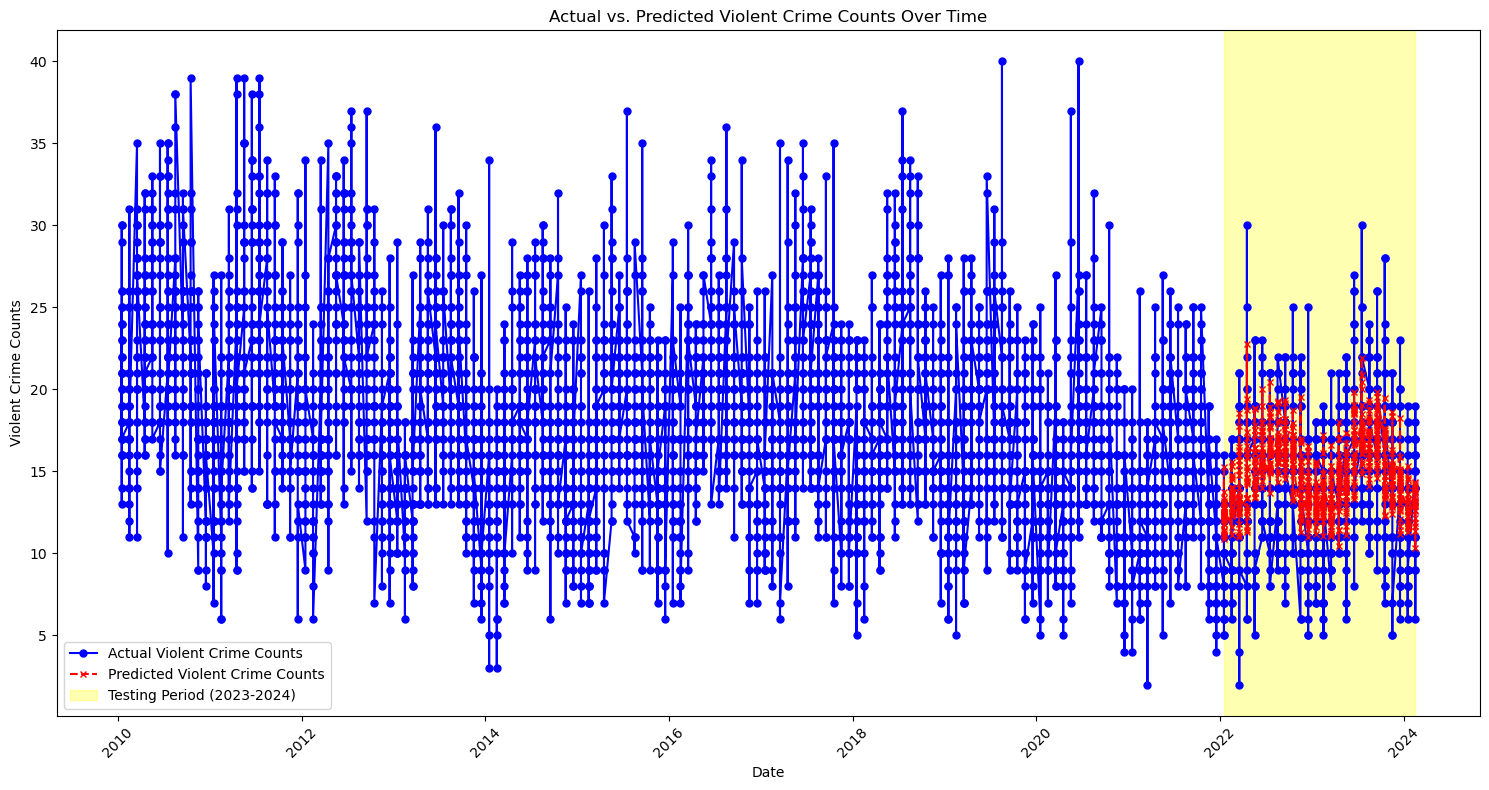

In [402]:
import matplotlib.pyplot as plt

test_data['Predicted_Violent'] = y_test_pred

# Combine training and testing data back into a single DataFrame for plotting
full_data = pd.concat([train_data, test_data])

# Sorting may not be necessary if your DataFrame is already in date order, but it's a good practice
full_data_sorted = full_data.sort_values(by='Date')

# Plotting
plt.figure(figsize=(15, 8))
plt.plot(full_data_sorted['Date'], full_data_sorted['Violent'], label='Actual Violent Crime Counts', color='blue', marker='o', linestyle='-', markersize=5)
plt.plot(full_data_sorted['Date'], full_data_sorted['Predicted_Violent'], label='Predicted Violent Crime Counts', color='red', marker='x', linestyle='--', markersize=5)

# Highlighting the testing period
plt.axvspan(test_data['Date'].min(), test_data['Date'].max(), color='yellow', alpha=0.3, label='Testing Period (2023-2024)')

plt.title('Actual vs. Predicted Violent Crime Counts Over Time')
plt.xlabel('Date')
plt.ylabel('Violent Crime Counts')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()